In [30]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, LSTM, Concatenate
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

no_words = 360
no_numerical_features = 3

lstm_input = Input(shape=(no_words, 1))
hidden1 = LSTM(256, return_sequences=True)(lstm_input)
hidden1_1 = LSTM(512)(hidden1)
hidden2 = Dense(128, activation='relu')(hidden1_1)
lstm_output = Dense(512, activation='tanh')(hidden2)
fnn_input=Input(shape=(no_numerical_features))
x = Concatenate()([lstm_output, fnn_input])
hidden_fnn1 = Dense(128, activation="relu")(x)
hidden_fnn2 = Dense(256, activation="relu")(hidden_fnn1)
hidden_fnn3 = Dense(512, activation="relu", name="hidden3")(Concatenate()([hidden_fnn2, hidden2]))
#hidden_fnn4 = Dense(256, activation="relu")(Concatenate()([hidden_fnn3, hidden_fnn1]))
hidden_fnn4 = Dense(256, activation="relu")(Concatenate()([hidden_fnn1, hidden_fnn3]))

dropout_fnn = layers.Dropout(0.6)(hidden_fnn4)
fnn_out = Dense(2, activation='sigmoid')(dropout_fnn)
model = Model(inputs=[lstm_input, fnn_input],outputs=fnn_out)

model.compile(loss='cel', optimizer='adam')
model.summary()
#model.fit([train_X_LSTM, train_X_MLP], train_y_LSTM, batch_size=64, epochs=10, validation_split=0.2)

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 360, 1)]     0                                            
__________________________________________________________________________________________________
lstm_21 (LSTM)                  (None, 360, 256)     264192      input_23[0][0]                   
__________________________________________________________________________________________________
lstm_22 (LSTM)                  (None, 512)          1574912     lstm_21[0][0]                    
__________________________________________________________________________________________________
dense_61 (Dense)                (None, 128)          65664       lstm_22[0][0]                    
___________________________________________________________________________________________

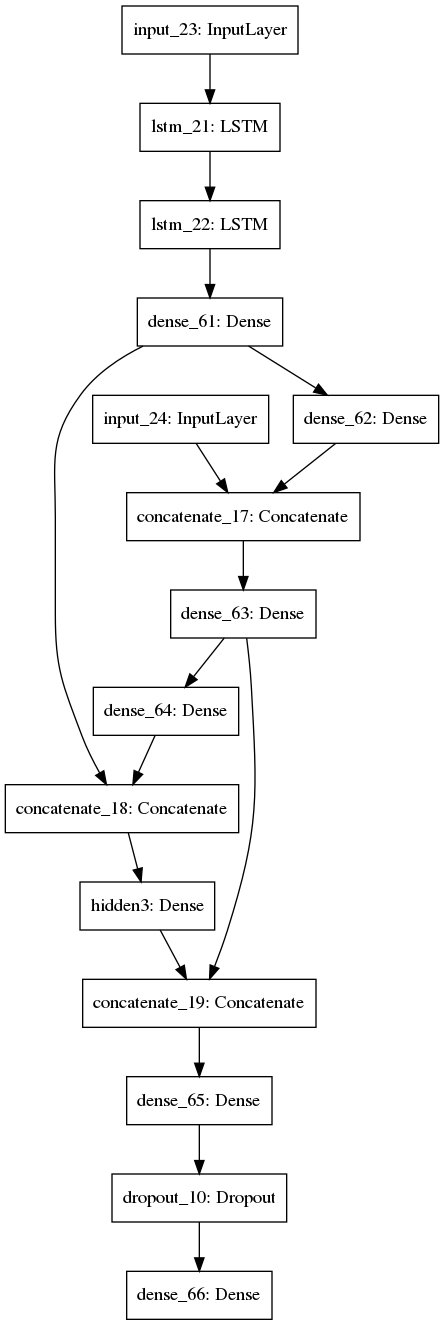

In [31]:
keras.utils.plot_model(model)